In [ ]:
'''
【项目04】  视频网站数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、数据清洗 - 时间标签转化
要求：
① 将时间字段改为时间标签
② 创建函数
提示：
需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

3、问题1 分析出不同导演电影的好评率，并筛选出TOP20
要求：
① 计算统计出不同导演的好评率，不要求创建函数
② 通过多系列柱状图，做图表可视化
提示：
① 好评率 = 好评数 / 评分人数
② 可自己设定图表风格

4、问题2 统计分析2001-2016年每年评影人数总量
要求：
① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
② 通过面积图，做图表可视化，分析每年人数总量变化规律
③ 验证是否有异常值（极度异常）
④ 创建函数分析出数据外限最大最小值）
⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
提示：
① 通过箱型图验证异常值情况
② 通过quantile(q=0.5)方法，得到四分位数
③ IQR=Q3-Q1
④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）
⑤ 可自己设定图表风格

'''

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# 数据读取

data = pd.read_csv('爱奇艺视频数据_utf8.csv', engine = 'python', encoding='utf-8')
print(data.head())

       数据获取日期   演员  视频ID                                        详细链接  \
0  2016年5月24日  NaN   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  NaN  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  NaN  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  NaN  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  NaN  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名 更新时间    ...     \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  NaN    ...      
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  NaN    ...      
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  NaN    ...      
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  NaN    ...      
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  NaN    ...      

     上映年份                                                 简介   导演      差评数  \
0  2004.0  在单子

In [4]:
# 数据清洗 - 去除空值
# 文本型字段空值改为“缺失数据”，数字型字段空值改为 0 
# 要求：创建函数
# 提示：fillna方法填充缺失数据，注意inplace参数

def data_cleaning(df):
    cols = df.columns
    for col in cols:
        if df[col].dtype ==  'object':
            df[col].fillna('缺失数据', inplace = True)
        else:
            df[col].fillna(0, inplace = True)
    return(df)
# 该函数可以将任意数据内空值替换

data_c1 = data_cleaning(data)
print(data_c1.head(10))

       数据获取日期    演员       视频ID                                        详细链接  \
0  2016年5月24日  缺失数据        100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  缺失数据       1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  缺失数据       1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  缺失数据       1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  缺失数据       1756   http://www.iqiyi.com/dianshiju/18jbj.html   
5  2016年5月24日  缺失数据       1757  http://www.iqiyi.com/dianshiju/18sdtk.html   
6  2016年5月24日  缺失数据       1837      http://www.iqiyi.com/dianshiju/dy.html   
7  2016年5月24日  缺失数据  200175401      http://www.iqiyi.com/a_19rrgjd745.html   
8  2016年5月24日  缺失数据  202938201      http://www.iqiyi.com/a_19rrhb9eet.html   
9  2016年5月24日  缺失数据       2212   http://www.iqiyi.com/dianshiju/yjjhx.html   

               剧名    状态                                类型 来源平台     整理后剧名  \
0     斗鱼Ⅱ(1-20)全集   已完结             粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺   

In [5]:
# 数据清洗 - 时间标签转化
# 将时间字段改为时间标签
# 要求：创建函数
# 提示：需要将中文日期转化为非中文日期，例如 2016年5月24日 → 2016.5.24

def data_time(df,*cols):
    for col in cols:
        df[col] = df[col].str.replace('年','.')
        df[col] = df[col].str.replace('月','.')
        df[col] = df[col].str.replace('日','')
        df[col] = pd.to_datetime(df[col])
    return(df)
# 该函数将输入列名的列，改为DatetimeIndex格式

data_c2 = data_time(data_c1,'数据获取日期')
print(data_c2.head(10))

      数据获取日期    演员       视频ID                                        详细链接  \
0 2016-05-24  缺失数据        100  http://www.iqiyi.com/dianshiju/douyu2.html   
1 2016-05-24  缺失数据       1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2 2016-05-24  缺失数据       1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3 2016-05-24  缺失数据       1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4 2016-05-24  缺失数据       1756   http://www.iqiyi.com/dianshiju/18jbj.html   
5 2016-05-24  缺失数据       1757  http://www.iqiyi.com/dianshiju/18sdtk.html   
6 2016-05-24  缺失数据       1837      http://www.iqiyi.com/dianshiju/dy.html   
7 2016-05-24  缺失数据  200175401      http://www.iqiyi.com/a_19rrgjd745.html   
8 2016-05-24  缺失数据  202938201      http://www.iqiyi.com/a_19rrhb9eet.html   
9 2016-05-24  缺失数据       2212   http://www.iqiyi.com/dianshiju/yjjhx.html   

               剧名    状态                                类型 来源平台     整理后剧名  \
0     斗鱼Ⅱ(1-20)全集   已完结             粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2   


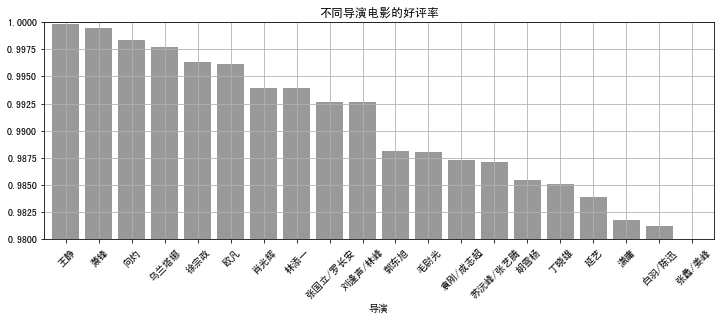

In [6]:
# 问题1 分析出不同导演电影的好评率，并筛选出TOP20
# 要求：
# ① 计算统计出不同导演的好评率，不要求创建函数
# ② 通过多系列柱状图，做图表可视化
# 提示：
# ① 好评率 = 好评数 / 评分人数

df_q1 = data_c2.groupby('导演')[['好评数','评分人数']].sum()
df_q1['好评率'] = df_q1['好评数'] / df_q1['评分人数']
result_q1 = df_q1.sort_values(['好评率'], ascending=False)[:20]
# 计算统计不同导演的好评率

result_q1['好评率'].plot(kind='bar',
       color = 'k',
       width = 0.8,
       alpha = 0.4,
       rot = 45,
       grid = True,
       ylim = [0.98,1],
       figsize = (12,4),
       title = '不同导演电影的好评率')

In [18]:
# 问题2 统计分析2001-2016年每年评影人数总量
# 要求：
# ① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
# ② 通过面积图，做图表可视化，分析每年人数总量变化规律
# ③ 验证是否有异常值（极度异常）
# ④ 创建函数分析出数据外限最大最小值）
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
# 提示：
# ① 通过箱型图验证异常值情况
# ② 通过quantile(q=0.5)方法，得到四分位数
# ③ IQR=Q3-Q1
# ④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）


q2data1 = data_c2[['导演','上映年份','整理后剧名']].drop_duplicates()  
q2data1 = q2data1[q2data1['上映年份'] != 0]
print(q2data1.head())
# 筛选出不同年份的数据，去除‘上映年份’字段缺失数据

q2data2 = data_c2.groupby('整理后剧名').sum()[['评分人数','好评数']]
print(q2data2.head())
# 求出不同剧的评分人数、好评数总和

q2data3 = pd.merge(q2data1,q2data2,left_on='整理后剧名',right_index=True)
print(q2data3.head())
# 合并数据，得到不同年份，不同剧的评分人数、好评数总和

q2data4 = q2data3.groupby('上映年份').sum()[['评分人数','好评数']]
print(q2data4.head())
# 按照电影上映年份统计，评分人数量

# fig1 = plt.figure(num=1,figsize=(12,4))
# q2data4['评分人数'].loc[2000:].plot.area(figsize = (10,4),
#                                     grid = True,
#                                     color = 'g',
#                                     alpha = 0.8)
# plt.xticks(range(2001,2016))
# plt.title('2001-2016年每年评影人数总量统计')
# 创建面积图
# 每年影评人数通过每个电影来判断是否合理？
# 存在异常值，哪些是异常值？

# fig,axes = plt.subplots(4,4,figsize=(10,16))
# start = 2001
# for i in range(4):
#     for j in range(4):
#         data = q2data3[q2data3['上映年份'] == start]
#         data[['评分人数','好评数']].boxplot(whis = 3,  # IQR为3
#                                             return_type='dict',ax = axes[i,j])  # 创建矩阵箱型图
#         start += 1
# 发现基本每年的数据中都有异常值，且为极度异常

     导演    上映年份     整理后剧名
0  缺失数据  2004.0       斗鱼2
1  缺失数据  2008.0    江湖兄弟全集
2  缺失数据  2005.0  肥猫寻亲记2全集
3  缺失数据  2006.0    舞台姐妹全集
4  缺失数据  2007.0   18禁不禁全集
                      评分人数        好评数
整理后剧名                                
101网校高考历史冲刺考点解析       90.0       78.0
10品官吴山羊            39019.0    26226.0
10大奇冤            1501112.0  1400608.0
10天10夜             12244.0     7540.0
10指连心              13537.0     9581.0
     导演    上映年份     整理后剧名        评分人数         好评数
0  缺失数据  2004.0       斗鱼2    974602.0    915253.0
1  缺失数据  2008.0    江湖兄弟全集   1181559.0    964472.0
2  缺失数据  2005.0  肥猫寻亲记2全集    301855.0    266774.0
3  缺失数据  2006.0    舞台姐妹全集     78834.0     65335.0
4  缺失数据  2007.0   18禁不禁全集  22441610.0  20536273.0
             评分人数        好评数
上映年份                        
1937.0    84367.0    63120.0
1985.0    98195.0    81247.0
1986.0    39689.0    27977.0
1987.0  2483977.0  2354832.0
1988.0   261731.0   214513.0


In [7]:
# 创建函数得到外限最大最小值
# 查看异常值

a = q2data3[q2data3['上映年份'] == 2001]
def data_error(df,col):
    q1 = df[col].quantile(q=0.25)  # 上四分位数
    q3 = df[col].quantile(q=0.75)  # 下四分位数
    iqr = q3 - q1   # IQR
    tmax = q3 + 3 * iqr  # 外限最大值
    tmin = q3 - 3 * iqr  # 外限最小值
    return(tmax,tmin)
# 创建函数，得到外限最大最小值

for i in range(2000,2016):
    datayear = q2data3[q2data3['上映年份'] == i]  # 筛选该年度的数据
    print('%i年有%i条数据' % (i,len(datayear)))  # 查看每年的数据量
    t = data_error(datayear,'评分人数')  # 得到外限最大最小值
    #print(t)
    print(datayear[datayear['评分人数'] > t[0]])  # 查看评分人数大于外限最大值的异常值
    print('-------\n')
# 查看异常值信息

2000年有40条数据
       导演    上映年份     整理后剧名         评分人数          好评数
704   刘家成  2000.0   铁齿铜牙纪晓岚   12231677.0   10887118.0
713   张国立  2000.0  康熙微服私访记3    2509980.0    2246035.0
979    梦继  2000.0   都是天使惹的祸    2078751.0    1870221.0
997   徐庆东  2000.0      重案6组    5849945.0    5294455.0
1494  张子恩  2000.0   上错花轿嫁对郎   11265400.0   10477592.0
1909  陈宝国  2000.0     请你原谅我  148345298.0  146438880.0
-------

2001年有49条数据
           导演    上映年份   整理后剧名       评分人数        好评数
1027       英达  2001.0   东北1家人  2674339.0  2550233.0
1338      王冀邢  2001.0      黑冰  1703364.0  1278592.0
1863      胡明凯  2001.0  少年包青天2  4809919.0  4335522.0
1972  陈家林、刘大印  2001.0    康熙王朝  4589462.0  3811875.0
-------

2002年有76条数据
          导演    上映年份       整理后剧名        评分人数         好评数
69       赵宝刚  2002.0  拿什么拯救你我的爱人   2184294.0   1954774.0
670      梁德龙  2002.0       少年张3丰  48030057.0  42450999.0
179      王文杰  2002.0         大染坊   1213903.0    943441.0
542      高力强  2002.0       乌龙闯情关  17787335.0  16282770.0
560      胡雪杨  2002.0   